<a href="https://colab.research.google.com/github/fouad89/nlp-tutorial/blob/main/Text_classification_using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train_data = fetch_20newsgroups(subset='train')
test_data = fetch_20newsgroups(subset='test')

In [15]:
model_pipeline = Pipeline([
                           ('tfidf', TfidfVectorizer()),
                           ('model', MultinomialNB())
])

In [16]:
model_pipeline.fit(train_data.data, train_data.target)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', MultinomialNB())])

In [17]:
y_pred = model_pipeline.predict(test_data.data)

In [20]:
print(classification_report(test_data.target, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

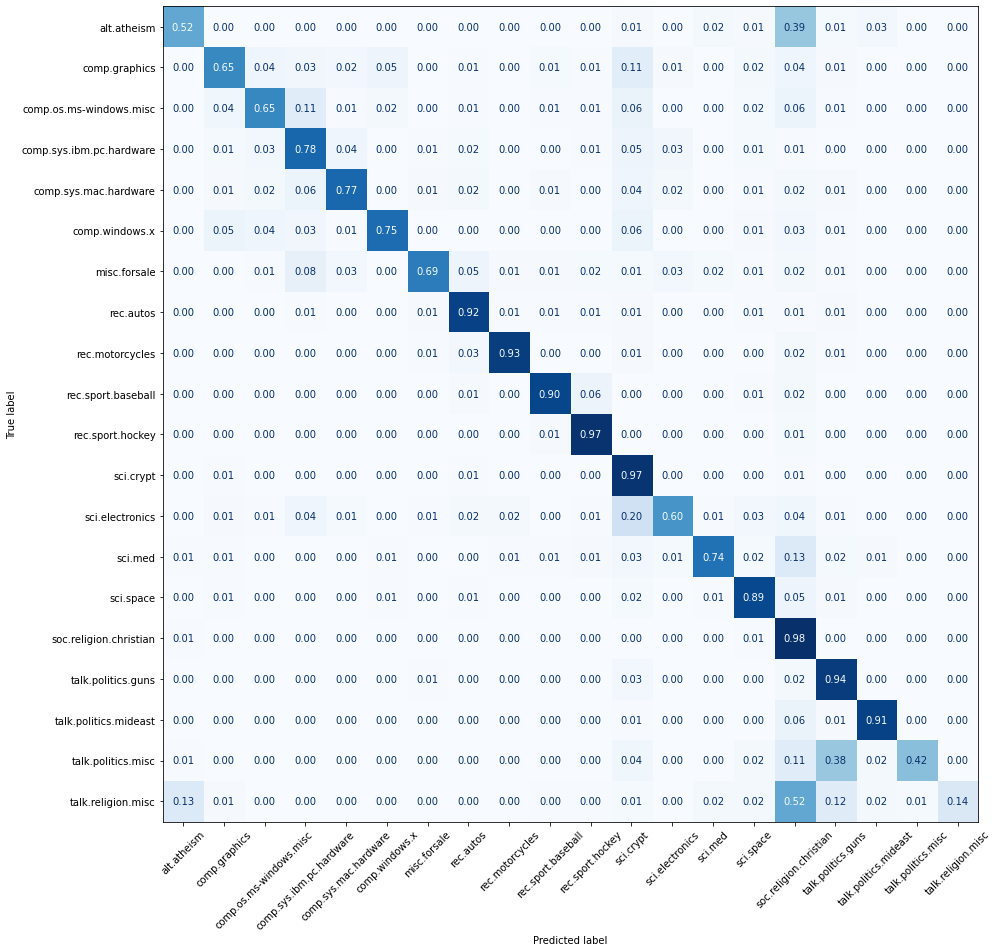

In [30]:
cm = confusion_matrix(test_data.target, y_pred, normalize='true')
fig, ax = plt.subplots(figsize=(15,15))


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.target_names)
disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
plt.xticks(rotation=45)
